# Supplementary Figure 3, WNN UMAP projection

In Supplementary Figure 3, we show UMAP projections for 3-way WNN of all cells that pass QC threshholds and are then labeled.

## Load packages

hise: The Human Immune System Explorer R SDK package  
purrr: Functional programming tools  
dplyr: Dataframe handling functions  
ggplot2: plotting functions  
ggrastr: raster plotting for ggplot2  
cowplot: multi-panel plot assembly  
Seurat: single-cell genomics methods  
ArchR: single-cell ATAC-seq methods

In [1]:
quiet_library <- function(...) { suppressPackageStartupMessages(library(...)) }
quiet_library(hise)
quiet_library(purrr)
quiet_library(dplyr)
quiet_library(ggplot2)
quiet_library(ggrastr)
quiet_library(cowplot)
quiet_library(Seurat)
quiet_library(ArchR)


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
out_dir <- "output/supp_figure_03"
if(!dir.exists(out_dir)) { dir.create(out_dir, recursive = TRUE) }

## Retrieve files

Now, we'll use the HISE SDK package to retrieve the Seurat objects and cell type labels based on file UUIDs. This will be placed in the `cache/` subdirectory by default.

In [3]:
so_uuids <- list(
    "7bdac6ef-e5e5-4150-b4f3-9c1a1e250334", # CD4 T cell Seurat object
    "46438bc4-cde6-4ae6-b349-9c513dd9d16f" # CD8 T cell Seurat object
)

In [4]:
so_res <- cacheFiles(so_uuids)
so_files <- list.files(
    paste0("cache/",so_uuids),
    recursive = TRUE, full.names = TRUE
)

In [5]:
label_uuids <- list(
    "ebd4bee7-2f5d-46e1-b2fc-22157f1b8d04", # CD4 type labels
    "4d6aade9-288c-452f-8f0d-ac59e539f4cc"  # CD8 type labels
)

In [6]:
label_res <- cacheFiles(label_uuids)
label_files <- list.files(
    paste0("cache/",label_uuids),
    recursive = TRUE, full.names = TRUE
)

In [7]:
arrow_uuids <- list(
    "052b769d-cbdf-41f6-8fe8-0d34564b442a",
    "16e0c562-5d36-431f-bb27-b443aabc7077",
    "30167a93-70a8-4c38-b615-2252dabe417e",
    "57dde81e-bdaa-4138-add6-2551968672f4",
    "6853fb68-fa85-43d5-9071-c5e42667a75e",
    "6d8185bf-8a35-492d-a6ab-5783006b3b8e",
    "8c2a93be-de53-4d6f-ae2e-ab40a356edc3",
    "9ab975f8-7763-4892-96a7-a7438ecc9470",
    "a56fd2ba-a055-4ff8-9ab1-69df113bc032",
    "ad2f347d-e961-4a70-b294-4df83c12355d",
    "c299a55a-3325-4eb3-ba8e-c8ceccafaa8c",
    "ff8fe67e-cfe0-482a-bad1-aa189390a1c0"
)

In [8]:
arrow_res <- cacheFiles(arrow_uuids)
arrow_files <- list.files(
    paste0("cache/",arrow_uuids),
    recursive = TRUE, full.names = TRUE
)

## All Cell WNN UMAPs

To demonstrate the full dataset, we'll run 3-way WNN on all cells, then plot timepoint, treatment, and CD4 and CD8 to show how the cells were separated for labeling.

In [9]:
all_labels <- map_dfr(label_files, read.csv)

### Run ArchR LSI

In [10]:
addArchRThreads(12)
addArchRGenome("hg38")
addArchRVerbose(FALSE)

Setting default number of Parallel threads to 12.

Setting default genome to Hg38.

Setting addArchRVerbose = FALSE



In [11]:
all_proj <- ArchRProject(
    ArrowFiles = arrow_files,
    copyArrows = FALSE,
    showLogo = FALSE
)

Using GeneAnnotation set by addArchRGenome(Hg38)!

Using GeneAnnotation set by addArchRGenome(Hg38)!

Validating Arrows...

Getting SampleNames...



Getting Cell Metadata...



Merging Cell Metadata...

Initializing ArchRProject...



In [12]:
archr_meta <- as.data.frame(getCellColData(all_proj))
archr_meta <- archr_meta %>%
  mutate(archr_name = rownames(archr_meta)) %>%
  filter(barcodes %in% all_labels$barcodes)

labeled_proj <- subsetArchRProject(
    all_proj,
    cells = archr_meta$archr_name,
    outputDirectory = "LabeledArchR")

Copying ArchRProject to new outputDirectory : /home/jupyter/repro-vrd-tea-seq/figures/LabeledArchR

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================#

In [13]:
labeled_proj <- addIterativeLSI(labeled_proj)

Checking Inputs...



Extract LSI dimensions and match the order of cells to the sampled metadata

In [14]:
lsi_mat <- getReducedDims(labeled_proj)
rownames(lsi_mat) <- sub(".+#", "", rownames(lsi_mat))
lsi_mat <- lsi_mat[all_labels$barcodes,]

Save LSI results

In [15]:
lsi_file <- file.path(out_dir, paste0("atac_labeled-cells_lsi_mat_", Sys.Date(), ".rds"))

saveRDS(lsi_mat, lsi_file)

### Assemble dataset

In [16]:
cd4_so <- readRDS(so_files[1])
cd8_so <- readRDS(so_files[2])

In [17]:
all_so <- merge(cd4_so, cd8_so)

In [18]:
all_meta <- all_so@meta.data
all_meta <- all_meta %>%
  left_join(all_labels)
rownames(all_meta) <- all_meta$barcodes
all_so@meta.data <- all_meta

Joining with `by = join_by(barcodes, treatment, timepoint)`


In [19]:
all_so <- all_so[,!is.na(all_meta$aifi_cell_type)]

In [20]:
all_so

An object of class Seurat 
36656 features across 147414 samples within 2 assays 
Active assay: RNA (36601 features, 0 variable features)
 1 other assay present: ADT

### Run Seurat PCA for scRNA

In [21]:
DefaultAssay(all_so) <- "RNA"
all_so <- FindVariableFeatures(all_so, nfeatures = 5000)
all_so <- NormalizeData(all_so)
all_so <- ScaleData(all_so)
all_so <- RunPCA(
    all_so, 
    reduction.name = "rnapca",
    reduction.key = "RNAPC_")

Centering and scaling data matrix

RNAPC_ 1 
Positive:  MALAT1, LINC00861, B2M, DPYD, ARHGAP15, AC016074.2, MAN1C1, LTB, LRRN3, PDE7A 
	   LEF1-AS1, SNTB1, IGF1R, ZBTB20, AC119396.1, CCND3, NUCB2, APBA2, PECAM1, MLLT3 
	   FOXP1, AK5, MIR181A1HG, LEF1, AFF3, ITGAL, FAM13A, MAML2, MT-CO1, STAT1 
Negative:  ATXN1, NIBAN1, GPRIN3, CD44, CRYBG1, PDE4B, TNIK, TAF4B, ARID5B, SAMD4A 
	   ARAP2, RYBP, IL2RA, ADAM19, PIP4K2A, AC016831.7, LINC00513, CMTM6, AHR, CYTIP 
	   PRKX, SLCO3A1, PGAP1, ANXA1, FKBP5, AKT3, UGCG, MDFIC, ARID4B, FRMD4B 
RNAPC_ 2 
Positive:  JUN, TNFAIP3, FOS, JUNB, SRGN, ZFP36L2, FOSB, ACTB, HSP90AA1, PPP1R16B 
	   DUSP1, NIBAN1, DUSP2, MYO1F, IQGAP2, NR4A2, PTMA, UTRN, IER2, RORA 
	   YPEL5, RAP1GAP2, TGFBR3, PHACTR2, KLF6, PARP8, CCL5, UBC, BTG2, ZEB2 
Negative:  MYB, BCL2, MBNL1, TXK, IGF1R, MLLT3, FKBP5, TAF4B, PLCL1, KLF7 
	   RIPOR2, RBMS1, ETS1, SFMBT2, IFNGR2, IKZF1, LEF1, PDK1, CYTIP, KANK1 
	   CHD7, DACT1, UBE2E2, PDE4B, PSMA1, DPP4, SCML1, STAMBPL1, NCOA3, SATB1

### Run Seurat PCA for ADT

In [22]:
DefaultAssay(all_so) <- "ADT"
all_so <- NormalizeData(
    all_so, 
    normalization.method = "CLR", 
    margin = 2) # normalize across cells

var_feats <- rownames(all_so)
var_veats <- var_feats[!grepl("Control", rownames(all_so))]
VariableFeatures(all_so) <- var_feats

all_so <- ScaleData(all_so)
all_so <- RunPCA(
    all_so, 
    npcs = 20, 
    ndims.print = 1,
    reduction.name = "adtpca",
    reduction.key = "ADTPC_")

Normalizing across cells

Centering and scaling data matrix

Warning message:
“Requested number is larger than the number of available items (55). Setting to 55.”
ADTPC_ 1 
Positive:  CD95, CD45RO, CD4, CD49d, CD196, CD278, CD161, CD71, CD25, CD194 
	   CD39, CD69, TIGIT, CD183, CD279, CD127, HLA.DR, CD28, CD27, CD26 
	   CD11c, TCR.A.B, CD103, CD244, CD86, CD134, CD57, CD152 
Negative:  CD45RA, CD8a, CD38, CD197, TCR.VA24.JA18.iNKT.cell, CD24, CD80, CD172a, IgG1.K.Isotype.Control, TCR.G.D 
	   CD319, CD40, CD137, CX3CR1, CD85j, CD294, CD192, CD21, CD304, CD366 
	   CD56, KLRG1, CD16, TCR.Va7.2, CD154, CD185, CD11b 



### Add ATAC LSI to Seurat Objects

In [23]:
lsi_mat <- lsi_mat[all_so$barcodes,]
        
# Spoofing counts using the LSI matrix
# we don't actually need counts, but we need Seurat to have an ATAC assay.

all_so[["ATAC"]] <- CreateAssayObject(
    counts = t(lsi_mat)
)

atac_rd <- CreateDimReducObject(
    embeddings = lsi_mat,
    assay = "ATAC",
    key = "ATACLSI_"
)
all_so@reductions$ataclsi <- atac_rd

### Run WNN

In [24]:
n_lsi <- ncol(lsi_mat)

In [25]:
all_so <- FindMultiModalNeighbors(
    all_so, 
    knn.graph.name = "wknn.tea",
    snn.graph.name = "wsnn.tea",
    weighted.nn.name = "weighted.nn.tea",
    reduction.list = c("rnapca", "adtpca", "ataclsi"),
    dims.list = list(1:30, 1:15, 1:n_lsi),
)

Calculating cell-specific modality weights

Finding 20 nearest neighbors for each modality.

Calculating kernel bandwidths

Finding multimodal neighbors

Constructing multimodal KNN graph

Constructing multimodal SNN graph



### Run UMAP

In [26]:
all_so <- RunUMAP(
    all_so, 
    nn.name = "weighted.nn.tea", 
    reduction.name = "umap_wnn_tea", 
    reduction.key = "wnnteaUMAP_"
)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
19:02:13 UMAP embedding parameters a = 0.9922 b = 1.112

19:02:14 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 20

19:02:19 Initializing from normalized Laplacian + noise (using irlba)

19:02:31 Commencing optimization for 200 epochs, with 4880078 positive edges

19:04:04 Optimization finished



### Extract UMAP coordinates

In [27]:
treat_colors <- read.csv("../common/color_sets/treatment_colors.csv")
treat_colors <- treat_colors %>%
  select(treatment, treatment_color)
timepoint_colors <- read.csv("../common/color_sets/timepoint_colors.csv")
timepoint_colors <- timepoint_colors %>%
  select(timepoint, timepoint_color)

In [28]:
umap_df <- as.data.frame(all_so@reductions$umap_wnn_tea@cell.embeddings)
names(umap_df) <- c("UMAP_1", "UMAP_2")
umap_df$barcodes <- rownames(umap_df)
rownames(umap_df) <- NULL

umap_df <- umap_df %>%
  left_join(all_so@meta.data) %>%
  select(barcodes, treatment, timepoint,
         UMAP_1, UMAP_2) %>%
  left_join(treat_colors) %>%
  left_join(timepoint_colors)%>%
  mutate(adt_CD4 = all_so[["ADT"]]@data["CD4",], 
         adt_CD8 = all_so[["ADT"]]@data["CD8a",])

Joining with `by = join_by(barcodes)`
Joining with `by = join_by(treatment)`
Joining with `by = join_by(timepoint)`


In [29]:
umap_file <- file.path(out_dir, paste0("umap_projection_", Sys.Date(), ".csv"))
write.csv(
    umap_df,
    umap_file,
    quote = FALSE,
    row.names = FALSE
)

### Generate UMAP Plots

In [30]:
umap_df <- umap_df[sample(1:nrow(umap_df), nrow(umap_df)),]

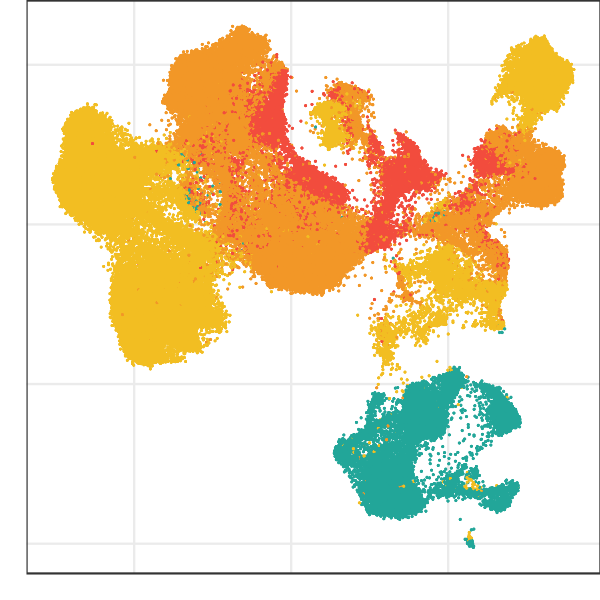

In [31]:
options(repr.plot.width = 5, repr.plot.height = 5)
timepoint_plot <- ggplot() +
  geom_point_rast(
      data = umap_df,
      aes(x = UMAP_1,
          y = UMAP_2,
          color = timepoint_color),
      size = 0.05
  ) +
  scale_x_continuous("") +
  scale_y_continuous("") +
  scale_color_identity() +
  theme_bw() +
  theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid.minor = element_blank(),
        plot.margin = margin(0,0,0,0))
timepoint_plot

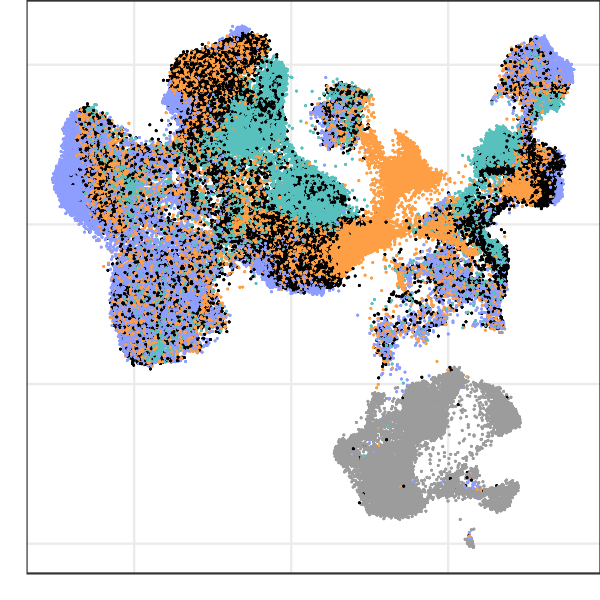

In [32]:
options(repr.plot.width = 5, repr.plot.height = 5)
treatment_plot <- ggplot() +
  geom_point_rast(
      data = umap_df,
      aes(x = UMAP_1,
          y = UMAP_2,
          color = treatment_color),
      size = 0.05
  ) +
  scale_x_continuous("") +
  scale_y_continuous("") +
  scale_color_identity() +
  theme_bw() +
  theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid.minor = element_blank(),
        plot.margin = margin(0,0,0,0))
treatment_plot

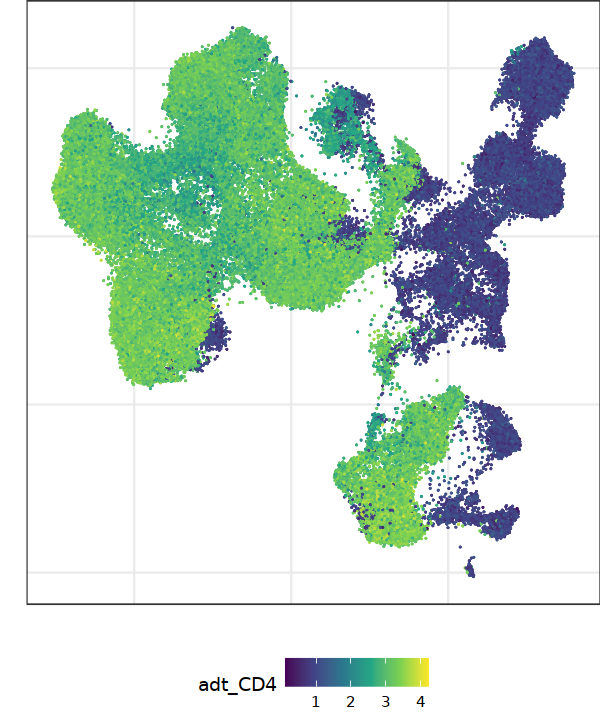

In [33]:
options(repr.plot.width = 5, repr.plot.height = 6)
cd4_plot <- ggplot() +
  geom_point_rast(
      data = umap_df,
      aes(x = UMAP_1,
          y = UMAP_2,
          color = adt_CD4),
      size = 0.05
  ) +
  scale_color_viridis_c() +
  scale_x_continuous("") +
  scale_y_continuous("") +
  theme_bw() +
  theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid.minor = element_blank(),
        plot.margin = margin(0,0,0,0),
        legend.position = "bottom")
cd4_plot

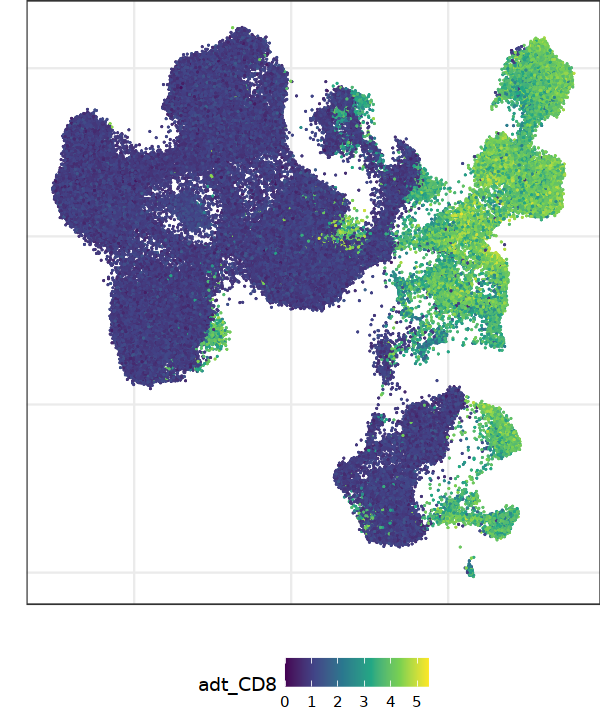

In [34]:
options(repr.plot.width = 5, repr.plot.height = 6)
cd8_plot <- ggplot() +
  geom_point_rast(
      data = umap_df,
      aes(x = UMAP_1,
          y = UMAP_2,
          color = adt_CD8),
      size = 0.05
  ) +
  scale_color_viridis_c() +
  scale_x_continuous("") +
  scale_y_continuous("") +
  theme_bw() +
  theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid.minor = element_blank(),
        plot.margin = margin(0,0,0,0),
        legend.position = "bottom")
cd8_plot

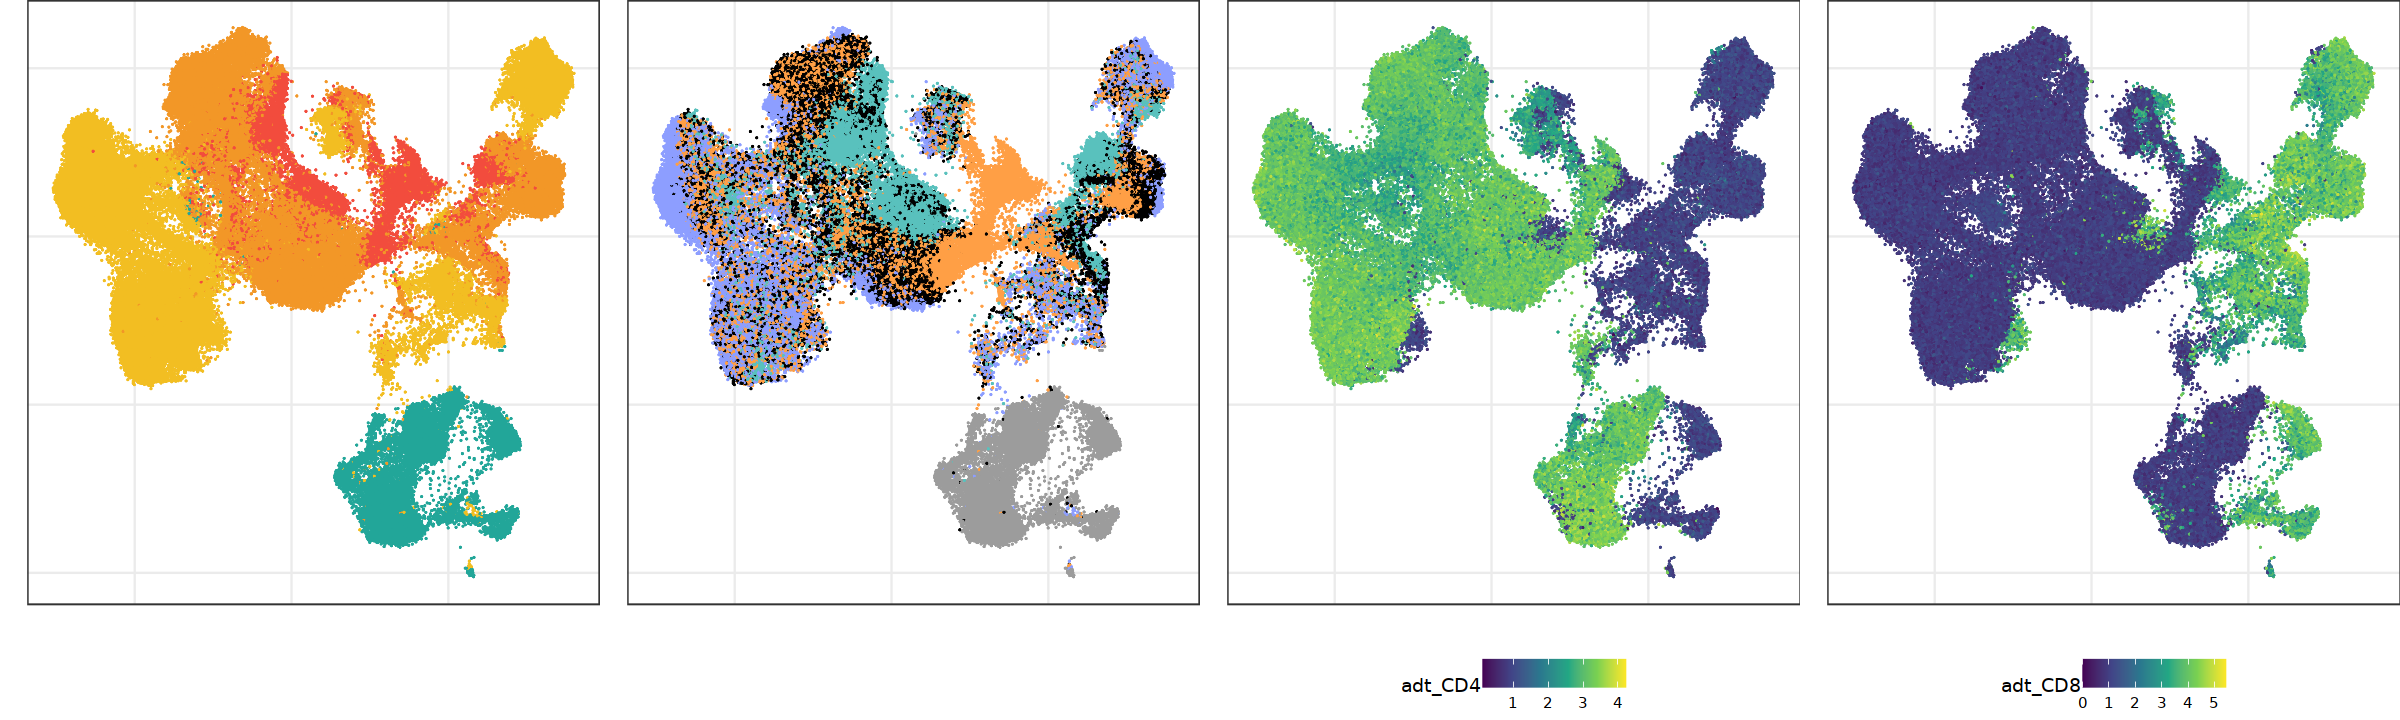

In [35]:
options(repr.plot.width = 20, repr.plot.height = 6)

all_plots <- plot_grid(
    timepoint_plot, treatment_plot,
    cd4_plot, cd8_plot,
    ncol = 4,
    nrow = 1,
    align = "h",
    axis = "tb"
)

all_plots

In [36]:
plot_file <- file.path(out_dir, paste0("all_cell_umaps_", Sys.Date(), ".pdf"))
ggsave(
    plot_file,
    all_plots,
    width = 20, height = 6
)

# Store results in HISE

Finally, we store the output file in our Collaboration Space for later retrieval and use. We need to provide the UUID for our Collaboration Space (aka `studySpaceId`), as well as a title for this step in our analysis process.

The hise function `uploadFiles()` also requires the FileIDs from the original fileset for reference.

In [37]:
study_space_uuid <- "40df6403-29f0-4b45-ab7d-f46d420c422e"
title <- paste("VRd TEA-seq Supp Fig 3 All Cell UMAPs", Sys.Date())

In [38]:
out_list <- as.list(c(lsi_file, umap_file, plot_file))

In [39]:
out_list

[[1]]
[1] "output/supp_figure_03/atac_labeled-cells_lsi_mat_2023-10-30.rds"

[[2]]
[1] "output/supp_figure_03/umap_projection_2023-10-30.csv"

[[3]]
[1] "output/supp_figure_03/all_cell_umaps_2023-10-30.pdf"

In [40]:
in_list <- c(
    so_uuids, label_uuids, arrow_uuids
)

In [41]:
uploadFiles(
    files = out_list,
    studySpaceId = study_space_uuid,
    title = title,
    inputFileIds = in_list,
    store = "project",
    doPrompt = FALSE
)

$files
$files[[1]]
[1] "output/supp_figure_03/atac_labeled-cells_lsi_mat_2023-10-30.rds"

$files[[2]]
[1] "output/supp_figure_03/umap_projection_2023-10-30.csv"

$files[[3]]
[1] "output/supp_figure_03/all_cell_umaps_2023-10-30.pdf"


$traceId
[1] "21de2a05-c2a5-4cf3-88ef-084c0ee44206"

In [42]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] uwot_0.1.16                       nabor_0.5.0                      
 [3] BSgenome.Hsapiens.UCSC.hg38_1.4.5 BSgenome_1.68.0                  
 [5] rtracklayer_1.60.1             